In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt

In [3]:
data = pd.read_csv('data/HDFC.csv')
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'])
data

C:\Users\shory\AppData\Local\Temp\ipykernel_10016\3974031942.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'])


,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES
0,HDFC,EQ,1128.25,1131.35,1110.15,1115.30,1115.50,1125.75,4842266,5.401148e+09,2016-03-30,148632
1,HDFC,EQ,1111.00,1118.95,1098.00,1105.60,1107.00,1115.30,9556036,1.056822e+10,2016-03-31,175689
2,HDFC,EQ,1100.00,1117.80,1092.25,1113.40,1115.20,1105.60,3894156,4.295293e+09,2016-04-01,136099
3,HDFC,EQ,1122.50,1124.25,1095.60,1103.70,1099.50,1113.40,3275522,3.619460e+09,2016-04-04,88687
4,HDFC,EQ,1102.00,1111.00,1085.50,1103.45,1098.15,1103.70,4368286,4.816386e+09,2016-04-05,94052
...,...,...,...,...,...,...,...,...,...,...,...,...
1707,HDFC,EQ,2615.00,2698.00,2609.95,2694.65,2696.05,2613.30,4067801,1.083496e+10,2023-02-03,167965
1708,HDFC,EQ,2692.00,2707.70,2671.55,2683.15,2684.40,2694.65,2364396,6.352097e+09,2023-02-06,151422
1709,HDFC,EQ,2684.40,2694.90,2654.00,2679.20,2680.65,2683.15,2494047,6.680941e+09,2023-02-07,105225
1710,HDFC,EQ,2676.35,2704.00,2675.00,2685.80,2679.00,2679.20,2202728,5.923950e+09,2023-02-08,115455


In [4]:
train = data.iloc[:-int(len(data) * 0.2)]
test = data.iloc[-int(len(data) * 0.2):]

In [14]:
def plot_trend(forecast1, forecast2, title):
  plt.figure(figsize=(10,10))
  plt.scatter(x=train['TIMESTAMP'], y=train['CLOSE'], label='Train')
  plt.scatter(x=test['TIMESTAMP'], y=test['CLOSE'], label='Test')
  plt.scatter(x=test['TIMESTAMP'], y=forecast1, label='Simple')
  plt.scatter(x=test['TIMESTAMP'], y=forecast2, label='Holt')
  
  plt.title(title)
  plt.grid(True)
  plt.legend()
  plt.xlabel('DATE')
  plt.ylabel('CLOSE PRICE')
  
  return plt.show()


In [15]:
# Fit simple model and get forecasts
model_simple = SimpleExpSmoothing(train['CLOSE']).fit(optimized=True)
forecasts_simple = model_simple.forecast(len(test))

In [16]:
# Fit Holt's model and get forecasts
model_holt = Holt(train['CLOSE'], damped_trend=True).fit(optimized=True)
forecasts_holt = model_holt.forecast(len(test))

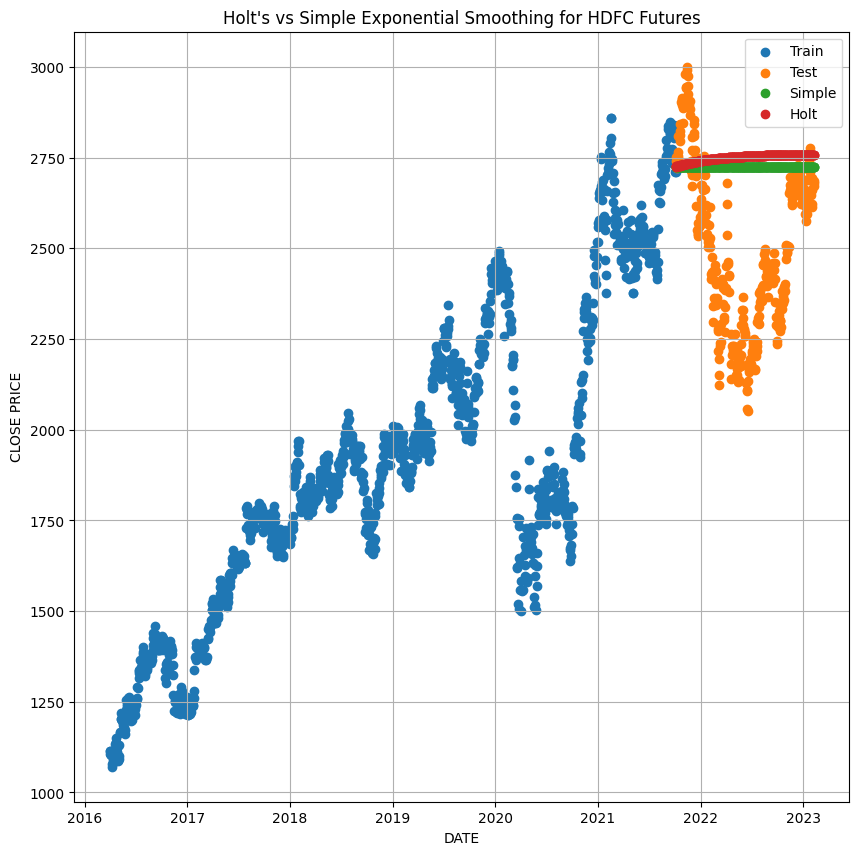

In [17]:
# Plot the forecasts
plot_trend(forecasts_simple, forecasts_holt, "Holt's vs Simple Exponential Smoothing for HDFC Futures")

In [18]:
model_simple.summary()

Dep. Variable:,CLOSE,No. Observations:,1370
Model:,SimpleExpSmoothing,SSE,1777828.912
Optimized:,True,AIC,9824.622
Trend:,None,BIC,9835.067
Seasonal:,None,AICC,9824.652
Seasonal Periods:,None,Date:,"Wed, 03 Jul 2024"
Box-Cox:,False,Time:,19:59:16
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9812642,alpha,True
initial_level,1115.3000,l.0,False


In [19]:
model_holt.summary()

Dep. Variable:,CLOSE,No. Observations:,1370
Model:,Holt,SSE,1785685.030
Optimized:,True,AIC,9836.663
Trend:,Additive,BIC,9862.776
Seasonal:,None,AICC,9836.745
Seasonal Periods:,None,Date:,"Wed, 03 Jul 2024"
Box-Cox:,False,Time:,19:59:16
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9876283,alpha,True
smoothing_trend,0.0024969,beta,True


Here the smoothing_level refers to the smoothing level parameter, α, and is very large indicating the level changes very frequently. However, the smoothing trend, which refers to the smoothing trend parameter, β, is comparatively smaller which means the trend barely changes that much. Finally, the damping_trend, which is ϕ, is large indicating that we need to forecast a long time in the future before we can observe the increasing trend decaying.